In [1]:
import pandas as pd
from datetime import date,timedelta

In [2]:
url="http://opendata.ecdc.europa.eu/covid19/casedistribution/csv/"
df2=pd.read_csv(url, parse_dates=["dateRep"], dayfirst=True)

In [3]:
df=df2[(df2.dateRep<pd.Timestamp(date.today()- timedelta(days = 1))) & (df2.dateRep>pd.Timestamp('2020-02-15'))].sort_values(by=["dateRep"], ascending=True)

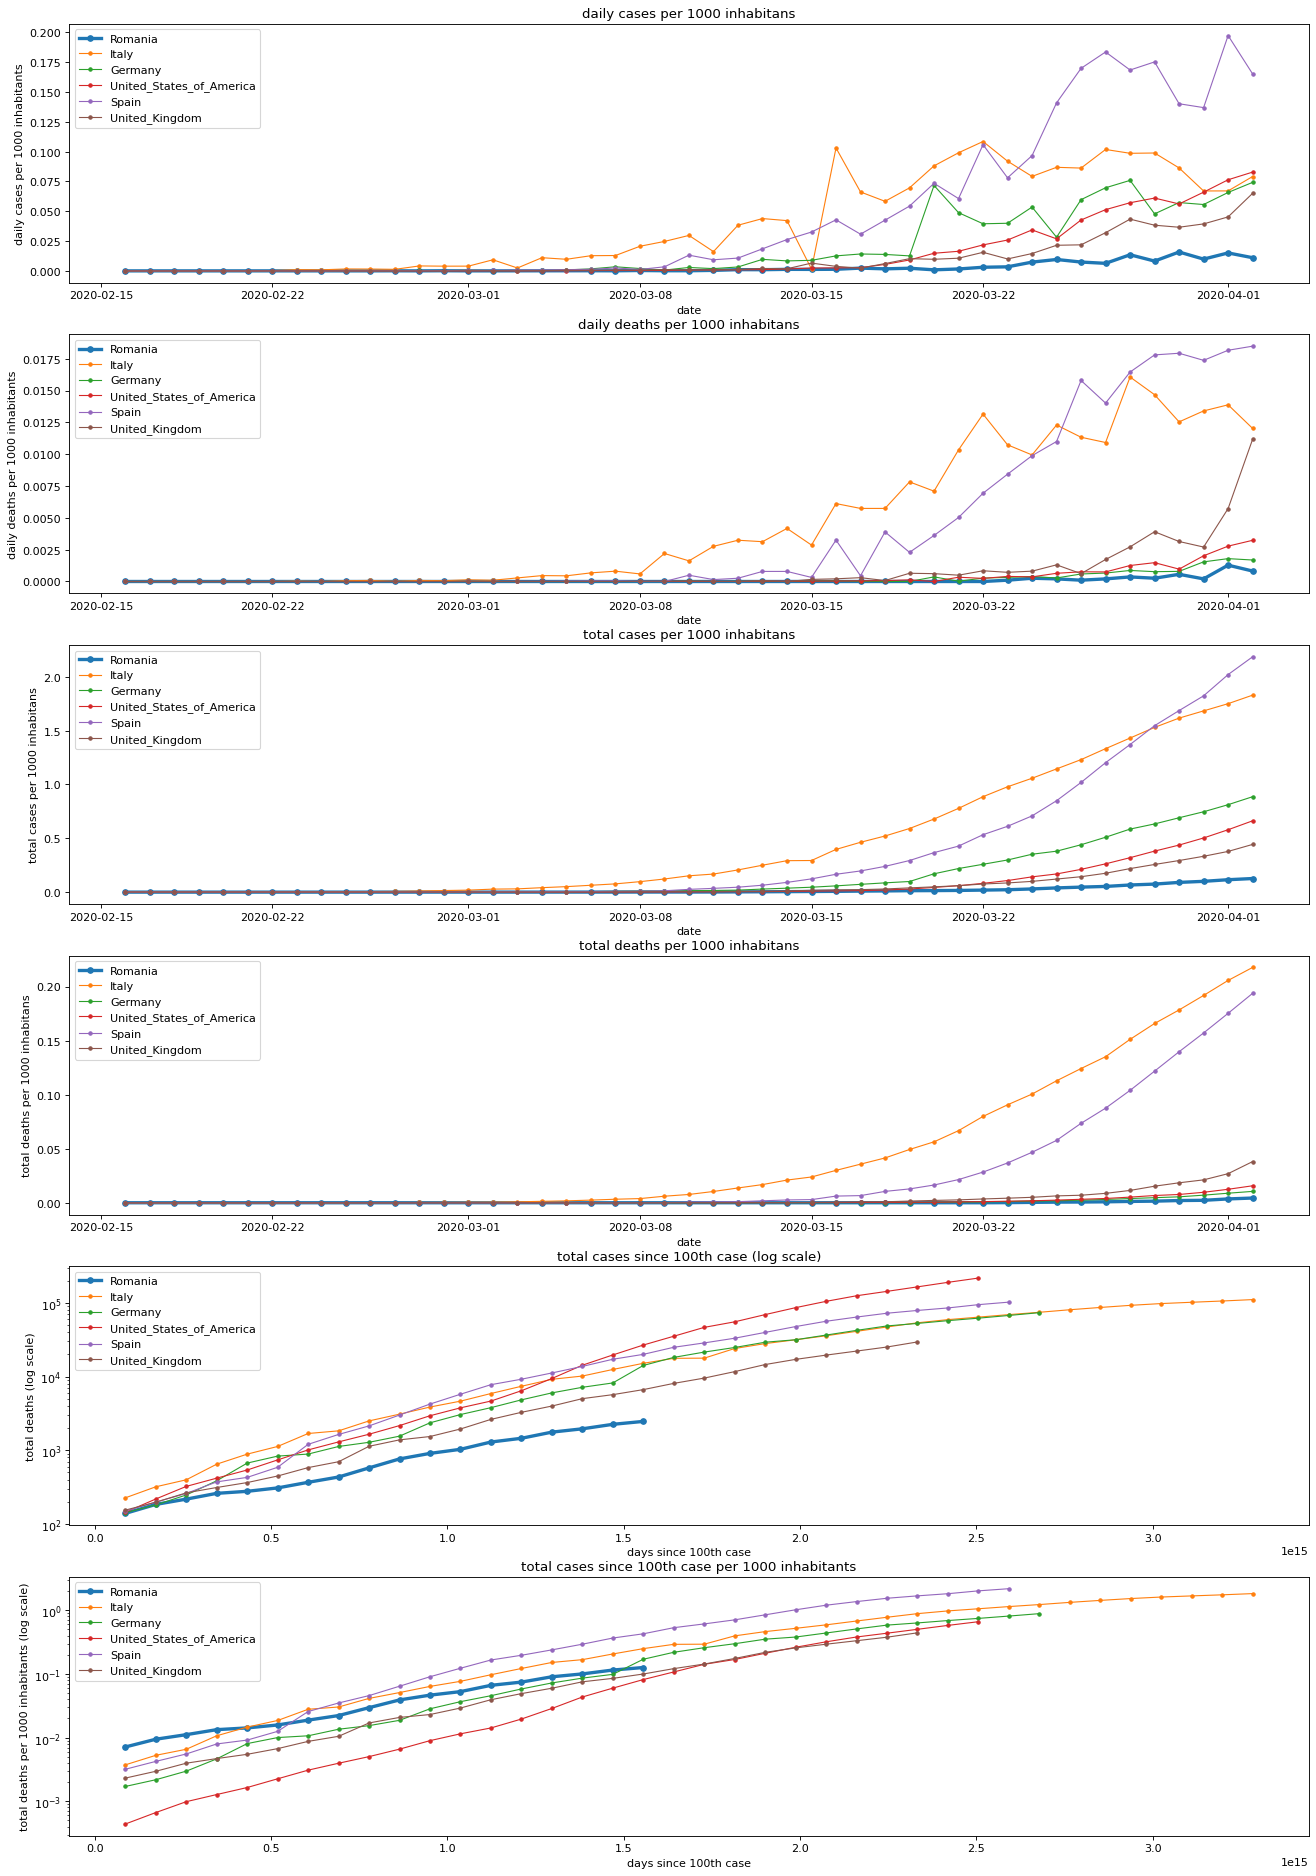

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax= plt.subplots(6, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')

countries= ["Romania","Italy","Germany","United_States_of_America","Spain","United_Kingdom"]

for country in countries:
    c=df[df.countriesAndTerritories==country].copy()
    c["total_cases"]=c.cases.cumsum()
    c["total_deaths"]=c.deaths.cumsum()
    
    dayWith100thcase=c[c.index==c[c['total_cases'].gt(100)].index[0]].dateRep
    c["days_since_100thcase"]=c.apply(lambda r: (r["dateRep"]-dayWith100thcase), axis=1)
    c2=c[c.days_since_100thcase > timedelta(0)]
    
    linewidth=1
    markersize=6
    if country=="Romania":
        linewidth=3
        markersize=10
        
    ax[0].plot(c.dateRep, c.cases/c.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)
    ax[1].plot(c.dateRep, c.deaths/c.popData2018*1000, linewidth=linewidth, marker=".",  markersize=markersize)
    ax[2].plot(c.dateRep, c.total_cases/c.popData2018*1000, linewidth=linewidth, marker=".",   markersize=markersize)
    ax[3].plot(c.dateRep, c.total_deaths/c.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)
    ax[4].plot(c2.days_since_100thcase, c2.total_cases, linewidth=linewidth, marker=".", markersize=markersize)
    ax[5].plot(c2.days_since_100thcase, c2.total_cases/c2.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)



 #   ax[2].plot(c.dateRep, c.total_cases)
 #   ax[3].plot(c.dateRep, c.total_deaths)


ax[0].set_title("daily cases per 1000 inhabitans")
ax[0].set_xlabel("date")
ax[0].set_ylabel("daily cases per 1000 inhabitants")

ax[1].set_title("daily deaths per 1000 inhabitans")
ax[1].set_xlabel("date")
ax[1].set_ylabel("daily deaths per 1000 inhabitants")


ax[2].set_title("total cases per 1000 inhabitans")
ax[2].set_xlabel("date")
ax[2].set_ylabel("total cases per 1000 inhabitans")


ax[3].set_title("total deaths per 1000 inhabitans")
ax[3].set_xlabel("date")
ax[3].set_ylabel("total deaths per 1000 inhabitans")


ax[4].set_title("total cases since 100th case (log scale)")
ax[4].set_xlabel("days since 100th case")
ax[4].set_ylabel("total deaths (log scale)")
ax[4].set_yscale("log")

ax[5].set_title("total cases since 100th case per 1000 inhabitants")
ax[5].set_xlabel("days since 100th case")
ax[5].set_ylabel("total deaths per 1000 inhabitants (log scale)")
ax[5].set_yscale("log")

#ax[2].set_yscale("log")
#ax[3].set_yscale("log")

for i in range(0,6):
    ax[i].legend(countries)

fig.savefig("romania_stats.png")